In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os
import cv2
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [42]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [43]:
path='../input/utkface-new/UTKFace/'
files=os.listdir(path)

In [44]:
image=cv2.imread(path+files[0])
image=np.expand_dims(image, 0)

In [45]:
X_data =[]
for file in files:
    face = cv2.imread(path +file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face,(32,32))
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

In [46]:
aug_X=[]
for image in X_data:
    image=np.expand_dims(image, 0)
    for i in range(3):                   #the number of iteration here is adjustabe according to your dataset and the model
        aug_image=data_augmentation(image)
        aug_X.append(aug_image)     

In [47]:
data=os.listdir("../input/utkface-new/UTKFace/")
y=[i.split("_")[1] for i in data ]
y=np.array(y,dtype=int)
y=np.repeat(y, 3)

In [48]:
X=np.squeeze(aug_X)

In [49]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X,y,test_size=0.33) 

In [50]:
print(X_train.shape,"\t", X_valid.shape,"\t", Y_train.shape,"\t",Y_valid.shape)

(47653, 32, 32, 3) 	 (23471, 32, 32, 3) 	 (47653,) 	 (23471,)


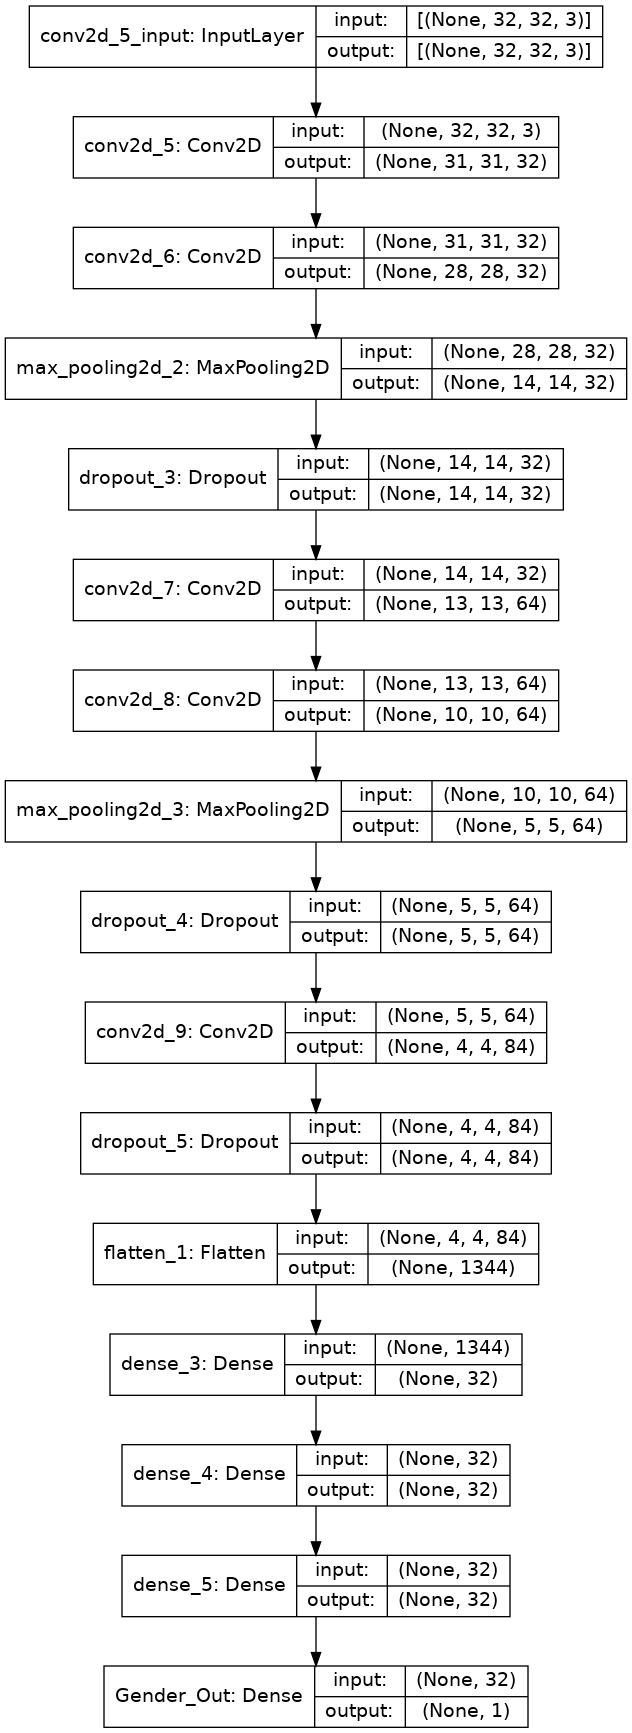

In [51]:
def model_gen():
    model=tf.keras.Sequential()
    model.add(layers.Conv2D(32,2,activation='relu',input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32,4,activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64,2,activation='relu'))
    model.add(layers.Conv2D(64,4,activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(84,2,activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid',name='Gender_Out'))
    model.compile(optimizer='Adamax',loss=['binary_crossentropy'],
                  metrics=['accuracy'])
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)

    return model

model=model_gen()
Image('model.png')

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 31, 32)        416       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        8256      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [53]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True) ]


In [54]:
history=model.fit(X_train, Y_train, epochs=90,batch_size=240,
          validation_data=(X_valid,Y_valid),callbacks=callbacks, shuffle=True)

Epoch 1/90
96/96 [==============================] - 3s 22ms/step - loss: 1.0245 - accuracy: 0.5156 - val_loss: 0.6833 - val_accuracy: 0.6431
Epoch 2/90
96/96 [==============================] - 2s 18ms/step - loss: 0.6637 - accuracy: 0.6126 - val_loss: 0.5968 - val_accuracy: 0.6992
Epoch 3/90
96/96 [==============================] - 2s 18ms/step - loss: 0.5983 - accuracy: 0.6895 - val_loss: 0.5617 - val_accuracy: 0.7243
Epoch 4/90
96/96 [==============================] - 2s 18ms/step - loss: 0.5801 - accuracy: 0.7026 - val_loss: 0.5553 - val_accuracy: 0.7306
Epoch 5/90
96/96 [==============================] - 2s 19ms/step - loss: 0.5646 - accuracy: 0.7149 - val_loss: 0.5336 - val_accuracy: 0.7434
Epoch 6/90
96/96 [==============================] - 2s 18ms/step - loss: 0.5523 - accuracy: 0.7248 - val_loss: 0.5254 - val_accuracy: 0.7502
Epoch 7/90
96/96 [==============================] - 2s 18ms/step - loss: 0.5406 - accuracy: 0.7317 - val_loss: 0.5186 - val_accuracy: 0.7538
Epoch 8/90
96

Epoch 59/90
96/96 [==============================] - 2s 18ms/step - loss: 0.3268 - accuracy: 0.8513 - val_loss: 0.3346 - val_accuracy: 0.8486
Epoch 60/90
96/96 [==============================] - 2s 19ms/step - loss: 0.3247 - accuracy: 0.8542 - val_loss: 0.3227 - val_accuracy: 0.8537
Epoch 61/90
96/96 [==============================] - 2s 19ms/step - loss: 0.3208 - accuracy: 0.8558 - val_loss: 0.3242 - val_accuracy: 0.8547
Epoch 62/90
96/96 [==============================] - 2s 19ms/step - loss: 0.3245 - accuracy: 0.8500 - val_loss: 0.3195 - val_accuracy: 0.8559
Epoch 63/90
96/96 [==============================] - 2s 20ms/step - loss: 0.3147 - accuracy: 0.8586 - val_loss: 0.3241 - val_accuracy: 0.8549
Epoch 64/90
96/96 [==============================] - 2s 19ms/step - loss: 0.3171 - accuracy: 0.8560 - val_loss: 0.3258 - val_accuracy: 0.8519
Epoch 65/90
96/96 [==============================] - 2s 18ms/step - loss: 0.3143 - accuracy: 0.8605 - val_loss: 0.3206 - val_accuracy: 0.8562
Epoch 

In [55]:
model.evaluate(X_valid,Y_valid)

734/734 [==============================] - 2s 3ms/step - loss: 0.3054 - accuracy: 0.8618


[0.30540260672569275, 0.8617869019508362]

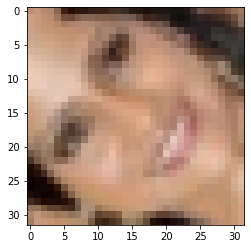

1
0.9898739


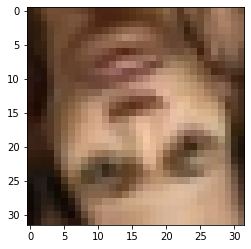

1
0.9232904


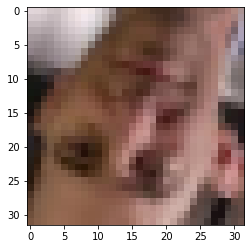

0
0.0033897737


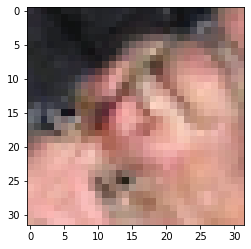

0
0.15659255


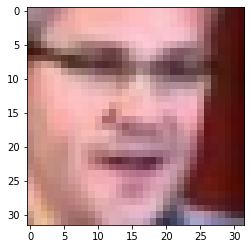

0
0.056763217


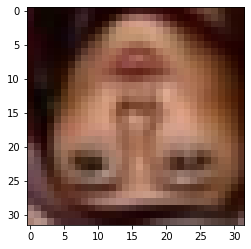

1
0.960873


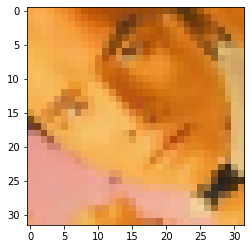

0
0.059425075


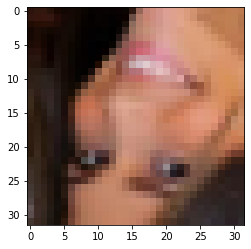

1
0.9882686


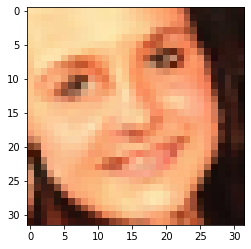

1
0.9525705


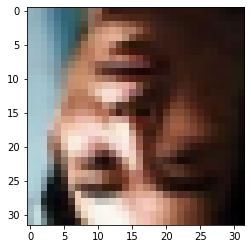

0
0.09326844


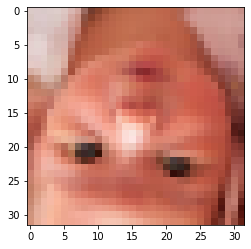

1
0.34151545


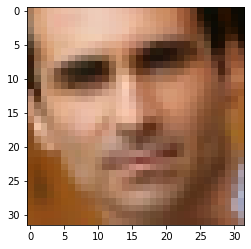

0
0.0008759696


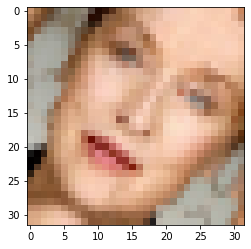

1
0.9191064


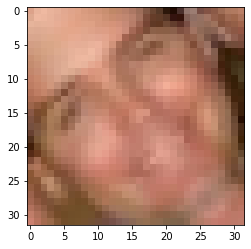

0
0.00802539


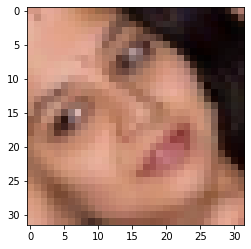

1
0.99040365


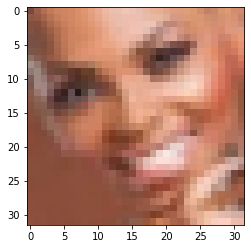

1
0.96395177


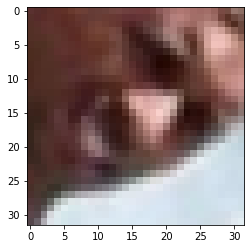

0
0.12006424


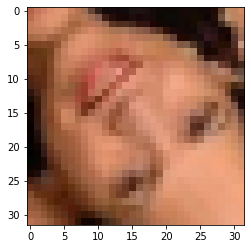

1
0.879468


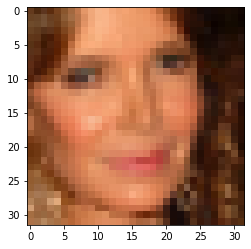

1
0.98754567


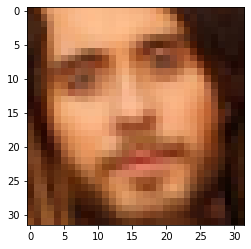

0
0.051953997


In [56]:
for p_id in range(600 , 800 , 10):
    plt.imshow(X_valid[p_id])
    plt.show()
    print(Y_valid[p_id])
    #print(y_valid[0][p_id],y_valid[1][p_id])
    print(model.predict(np.expand_dims(X_valid[p_id],axis=0))[0][0])
    #np.expand_dims(X_valid[p_id],axis=0)

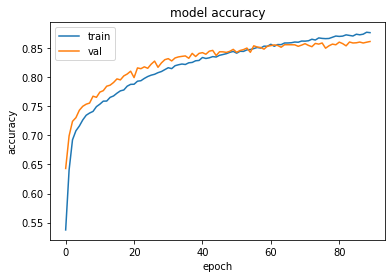

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

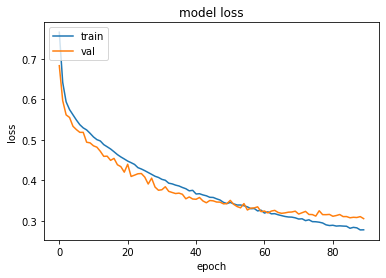

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
#model.save("Gender_AE.h5")